<a href="https://colab.research.google.com/github/haeuniya/CIFAR10_ImageDeepLearning_Using_CNN/blob/main/CNN%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_CIFAR_10_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
391/391 - 61s - loss: 1.6224 - accuracy: 0.4116 - val_loss: 1.3637 - val_accuracy: 0.5083 - 61s/epoch - 157ms/step
Epoch 2/10
391/391 - 59s - loss: 1.2939 - accuracy: 0.5376 - val_loss: 1.2035 - val_accuracy: 0.5705 - 59s/epoch - 151ms/step
Epoch 3/10
391/391 - 59s - loss: 1.1306 - accuracy: 0.5985 - val_loss: 1.1149 - val_accuracy: 0.6076 - 59s/epoch - 150ms/step
Epoch 4/10
391/391 - 59s - loss: 1.0130 - accuracy: 0.6472 - val_loss: 0.9856 - val_accuracy: 0.6545 - 59s/epoch - 150ms/step
Epoch 5/10
391/391 - 59s - loss: 0.9362 - accuracy: 0.6722 - val_loss: 0.9678 - val_accuracy: 0.6586 - 59s/epoch - 150ms/step
Epoch 6/10
391/391 - 59s - loss: 0.8697 - accuracy: 0.6957 - val_loss: 0.9292 - val_accuracy: 0.6771 - 59s/epoch - 150ms/step
Epoch 7/10
391/391 - 58s - loss: 0.8177 - accuracy: 0.7152 - val_loss: 0.8979 - val_accuracy: 0.6892 - 58s/epoch - 149ms/step
Epoch 8/10
391/391 - 58s - loss: 0.7714 - accuracy: 0.7311 - val_loss: 0.8463 - val_accuracy: 0.7033 - 58s/epoch - 149

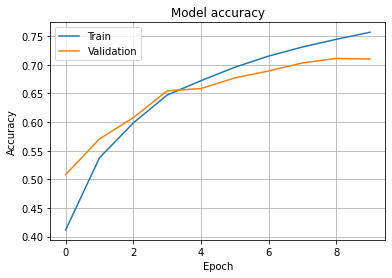

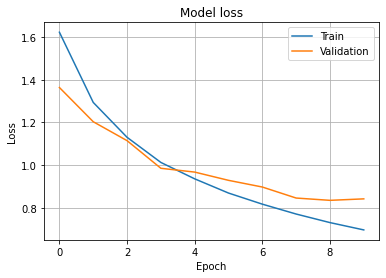

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn=Sequential() # Sequential 함수 cnn이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 MSE(평균제곱오차)를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("손실률은", res[0]*100)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")


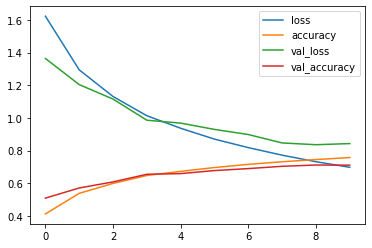

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

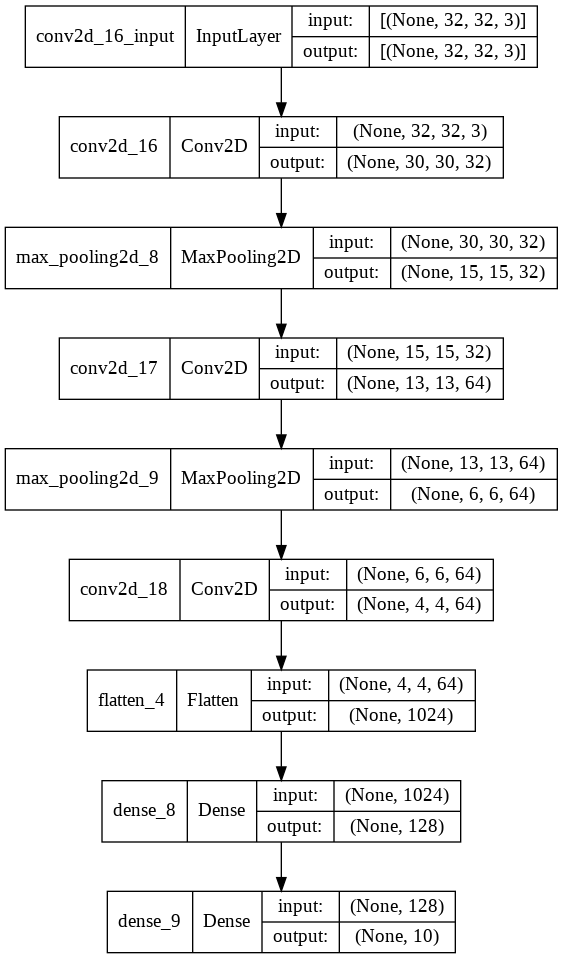

In [ ]:
utils.plot_model(cnn, "model.png", True)

epoch 10->50 증가

170508288/170498071 [==============================] - 4s 0us/step
Epoch 1/50
391/391 - 62s - loss: 1.6385 - accuracy: 0.3975 - val_loss: 1.3674 - val_accuracy: 0.5022 - 62s/epoch - 159ms/step
Epoch 2/50
391/391 - 61s - loss: 1.2770 - accuracy: 0.5465 - val_loss: 1.2211 - val_accuracy: 0.5710 - 61s/epoch - 156ms/step
Epoch 3/50
391/391 - 61s - loss: 1.1234 - accuracy: 0.6038 - val_loss: 1.0428 - val_accuracy: 0.6314 - 61s/epoch - 155ms/step
Epoch 4/50
391/391 - 60s - loss: 1.0129 - accuracy: 0.6452 - val_loss: 1.0468 - val_accuracy: 0.6361 - 60s/epoch - 155ms/step
Epoch 5/50
391/391 - 61s - loss: 0.9310 - accuracy: 0.6731 - val_loss: 0.9412 - val_accuracy: 0.6691 - 61s/epoch - 156ms/step
Epoch 6/50
391/391 - 61s - loss: 0.8692 - accuracy: 0.6962 - val_loss: 0.9174 - val_accuracy: 0.6838 - 61s/epoch - 157ms/step
Epoch 7/50
391/391 - 61s - loss: 0.8179 - accuracy: 0.7142 - val_loss: 0.8871 - val_accuracy: 0.6944 - 61s/epoch - 156ms/step
Epoch 8/50
391/391 - 61s - loss: 0.7680 - accuracy:

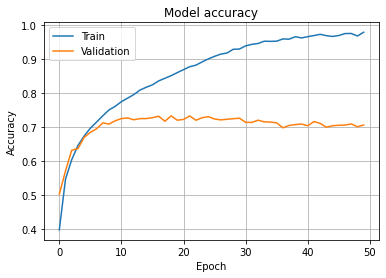

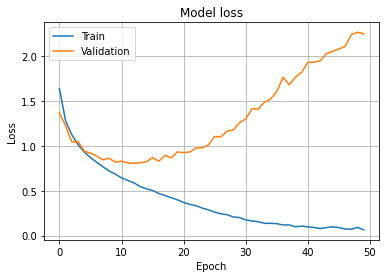

INFO:tensorflow:Assets written to: my_epoch_cnn/assets


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
epoch_cnn=Sequential() # Sequential 함수 cnn이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
epoch_cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
epoch_cnn.add(MaxPooling2D(pool_size=(2,2)))
epoch_cnn.add(Conv2D(64,(3,3),activation='relu'))
epoch_cnn.add(MaxPooling2D(pool_size=(2,2)))
epoch_cnn.add(Conv2D(64,(3,3),activation='relu'))
epoch_cnn.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
epoch_cnn.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
epoch_cnn.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
epoch_cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 MSE(평균제곱오차)를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=epoch_cnn.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=epoch_cnn.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("손실률은", res[0]*100)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
epoch_cnn.save("my_epoch_cnn")


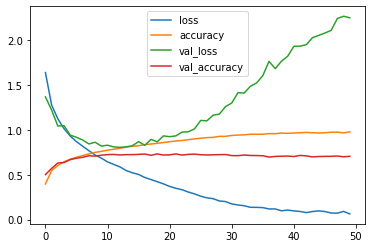

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

layer 추가 (epoch - 10)

170508288/170498071 [==============================] - 4s 0us/step
Epoch 1/10
391/391 - 186s - loss: 1.7772 - accuracy: 0.3380 - val_loss: 1.5291 - val_accuracy: 0.4454 - 186s/epoch - 476ms/step
Epoch 2/10
391/391 - 161s - loss: 1.4005 - accuracy: 0.4919 - val_loss: 1.2796 - val_accuracy: 0.5360 - 161s/epoch - 412ms/step
Epoch 3/10
391/391 - 153s - loss: 1.1977 - accuracy: 0.5725 - val_loss: 1.1573 - val_accuracy: 0.5921 - 153s/epoch - 392ms/step
Epoch 4/10
391/391 - 156s - loss: 1.0595 - accuracy: 0.6244 - val_loss: 1.0681 - val_accuracy: 0.6301 - 156s/epoch - 399ms/step
Epoch 5/10
391/391 - 155s - loss: 0.9638 - accuracy: 0.6618 - val_loss: 0.9921 - val_accuracy: 0.6546 - 155s/epoch - 396ms/step
Epoch 6/10
391/391 - 156s - loss: 0.8838 - accuracy: 0.6915 - val_loss: 0.9465 - val_accuracy: 0.6693 - 156s/epoch - 399ms/step
Epoch 7/10
391/391 - 155s - loss: 0.8201 - accuracy: 0.7131 - val_loss: 0.9233 - val_accuracy: 0.6815 - 155s/epoch - 397ms/step
Epoch 8/10
391/391 - 164s - loss: 0.7

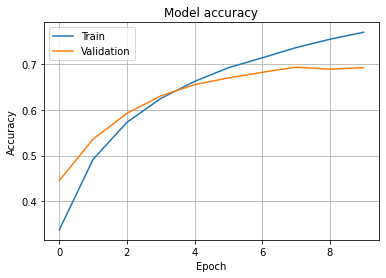

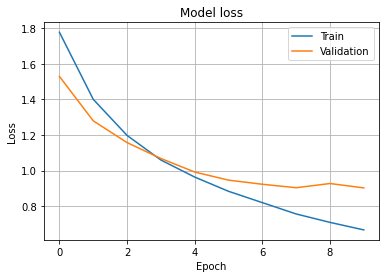

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn2=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn2.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn2.add(Conv2D(32,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(128,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn2.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn2.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn2.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 MSE(평균제곱오차)를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn2.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn2.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn2.save("my_cnn2.h5")

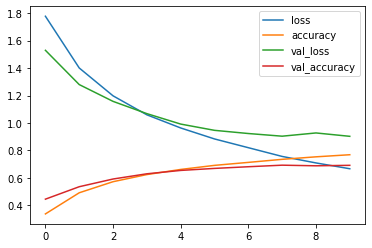

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

In [ ]:
cnn2.summary()

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn2, "model(layer 추가 + epoch10).png", True)

layer 추가 (epoch - 50)

Epoch 1/50
391/391 - 161s - loss: 1.7627 - accuracy: 0.3466 - val_loss: 1.5130 - val_accuracy: 0.4390 - 161s/epoch - 412ms/step
Epoch 2/50
391/391 - 162s - loss: 1.4026 - accuracy: 0.4923 - val_loss: 1.3576 - val_accuracy: 0.5175 - 162s/epoch - 415ms/step
Epoch 3/50
391/391 - 161s - loss: 1.2175 - accuracy: 0.5656 - val_loss: 1.2493 - val_accuracy: 0.5587 - 161s/epoch - 411ms/step
Epoch 4/50
391/391 - 162s - loss: 1.0993 - accuracy: 0.6133 - val_loss: 1.0764 - val_accuracy: 0.6253 - 162s/epoch - 415ms/step
Epoch 5/50
391/391 - 161s - loss: 0.9957 - accuracy: 0.6477 - val_loss: 1.1132 - val_accuracy: 0.6072 - 161s/epoch - 411ms/step
Epoch 6/50
391/391 - 160s - loss: 0.9202 - accuracy: 0.6775 - val_loss: 0.9926 - val_accuracy: 0.6591 - 160s/epoch - 409ms/step
Epoch 7/50
391/391 - 161s - loss: 0.8443 - accuracy: 0.7054 - val_loss: 0.9444 - val_accuracy: 0.6730 - 161s/epoch - 413ms/step
Epoch 8/50
391/391 - 161s - loss: 0.7902 - accuracy: 0.7247 - val_loss: 0.9582 - val_accuracy: 0.6752 - 

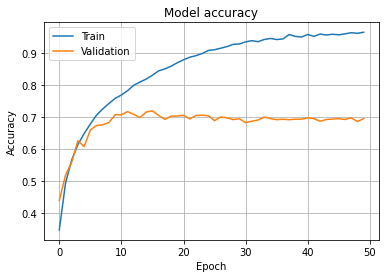

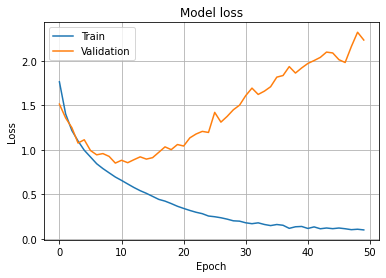

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn2=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn2.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn2.add(Conv2D(32,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(128,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn2.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn2.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn2.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 MSE(평균제곱오차)를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn2.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn2.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn2.save("my_cnn2.h5")

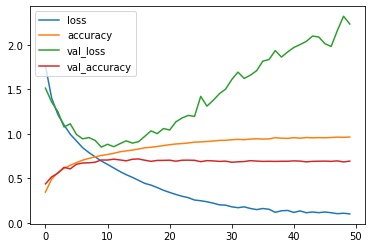

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

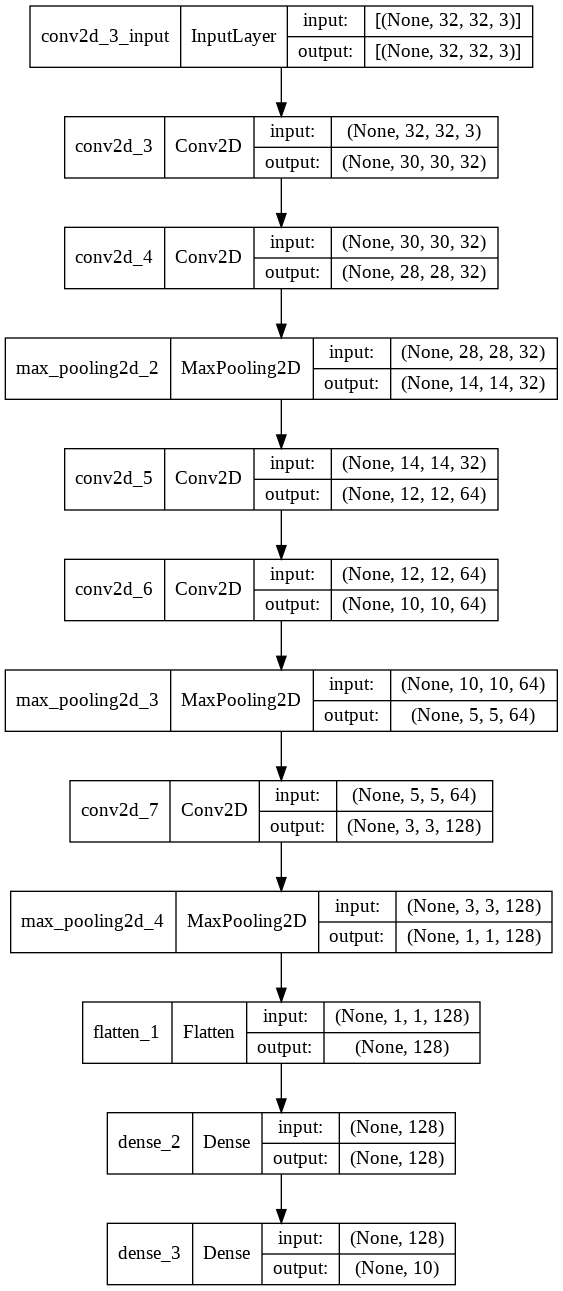

In [ ]:
utils.plot_model(cnn2, "model.png", True)

드롭아웃

Epoch 1/50
391/391 - 171s - loss: 1.8654 - accuracy: 0.2947 - val_loss: 1.5902 - val_accuracy: 0.4087 - 171s/epoch - 438ms/step
Epoch 2/50
391/391 - 165s - loss: 1.5001 - accuracy: 0.4510 - val_loss: 1.3283 - val_accuracy: 0.5192 - 165s/epoch - 422ms/step
Epoch 3/50
391/391 - 164s - loss: 1.3317 - accuracy: 0.5231 - val_loss: 1.1735 - val_accuracy: 0.5774 - 164s/epoch - 421ms/step
Epoch 4/50
391/391 - 170s - loss: 1.2318 - accuracy: 0.5635 - val_loss: 1.0893 - val_accuracy: 0.6086 - 170s/epoch - 436ms/step
Epoch 5/50
391/391 - 169s - loss: 1.1486 - accuracy: 0.5952 - val_loss: 1.0378 - val_accuracy: 0.6311 - 169s/epoch - 432ms/step
Epoch 6/50
391/391 - 168s - loss: 1.0892 - accuracy: 0.6176 - val_loss: 0.9864 - val_accuracy: 0.6501 - 168s/epoch - 429ms/step
Epoch 7/50
391/391 - 168s - loss: 1.0291 - accuracy: 0.6423 - val_loss: 0.9207 - val_accuracy: 0.6750 - 168s/epoch - 430ms/step
Epoch 8/50
391/391 - 169s - loss: 0.9912 - accuracy: 0.6580 - val_loss: 0.9127 - val_accuracy: 0.6792 - 

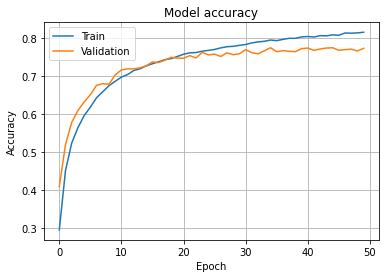

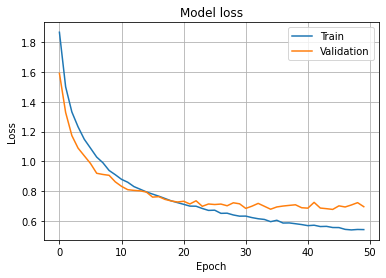

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn3=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn3.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn3.add(Conv2D(32,(3,3),activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25)) # 드롭아웃 적용
cnn3.add(Conv2D(64,(3,3),activation='relu'))
cnn3.add(Conv2D(64,(3,3),activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25)) # 드롭아웃 적용
cnn3.add(Conv2D(128,(3,3),activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))

cnn3.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn3.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn3.add(Dropout(0.5)) # 드롭아웃 적용
cnn3.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn3.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn3.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn3.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn3.save("my_cnn3.h5")

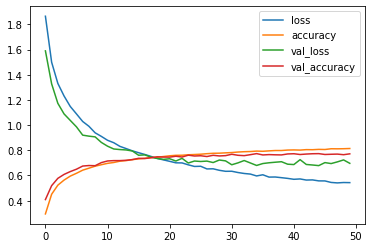

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

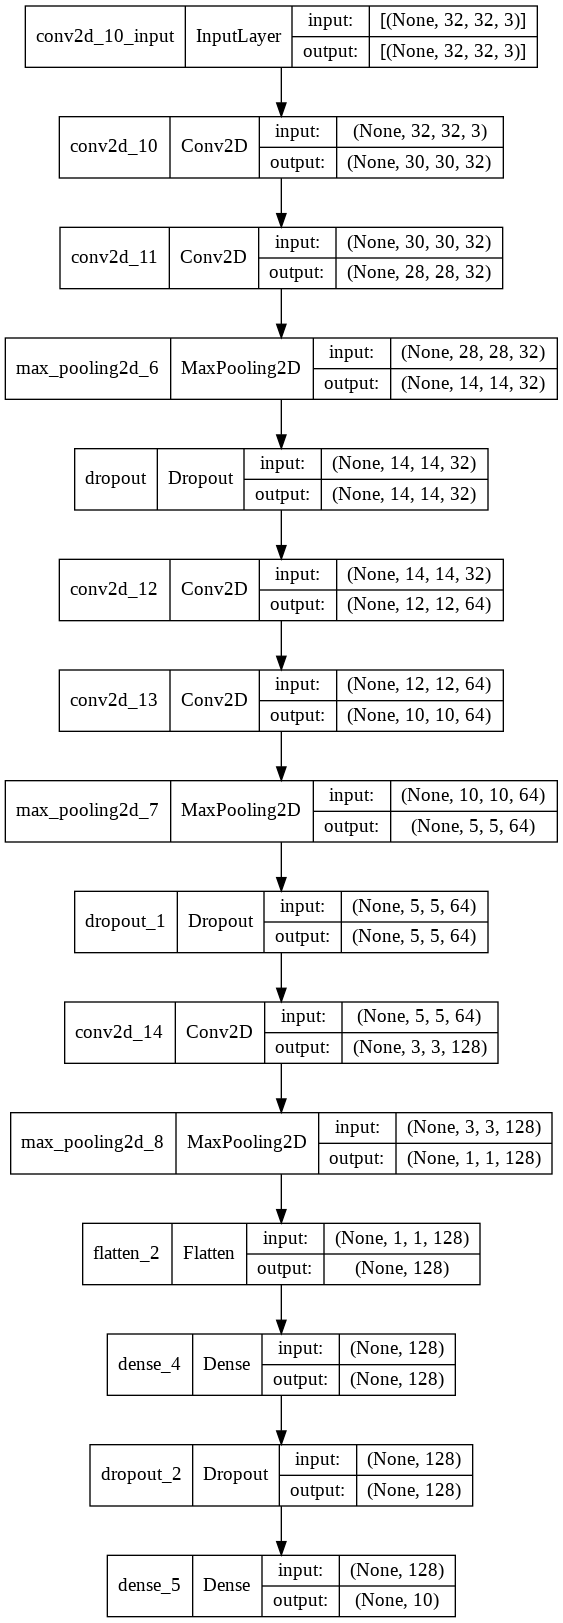

In [ ]:
utils.plot_model(cnn3, "model.png", True)

Dropout + maxpooling2D -> averagepooling2D

Epoch 1/50
391/391 - 189s - loss: 1.8856 - accuracy: 0.2809 - val_loss: 1.5465 - val_accuracy: 0.4210 - 189s/epoch - 483ms/step
Epoch 2/50
391/391 - 183s - loss: 1.4871 - accuracy: 0.4562 - val_loss: 1.2845 - val_accuracy: 0.5279 - 183s/epoch - 468ms/step
Epoch 3/50
391/391 - 166s - loss: 1.3198 - accuracy: 0.5253 - val_loss: 1.1951 - val_accuracy: 0.5705 - 166s/epoch - 425ms/step
Epoch 4/50
391/391 - 200s - loss: 1.2165 - accuracy: 0.5697 - val_loss: 1.0991 - val_accuracy: 0.6099 - 200s/epoch - 511ms/step
Epoch 5/50
391/391 - 186s - loss: 1.1323 - accuracy: 0.6045 - val_loss: 1.0080 - val_accuracy: 0.6391 - 186s/epoch - 475ms/step
Epoch 6/50
391/391 - 170s - loss: 1.0667 - accuracy: 0.6295 - val_loss: 0.9755 - val_accuracy: 0.6561 - 170s/epoch - 435ms/step
Epoch 7/50
391/391 - 159s - loss: 1.0139 - accuracy: 0.6479 - val_loss: 0.9328 - val_accuracy: 0.6737 - 159s/epoch - 407ms/step
Epoch 8/50
391/391 - 159s - loss: 0.9614 - accuracy: 0.6661 - val_loss: 0.8897 - val_accuracy: 0.6862 - 

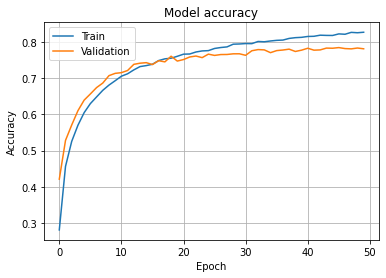

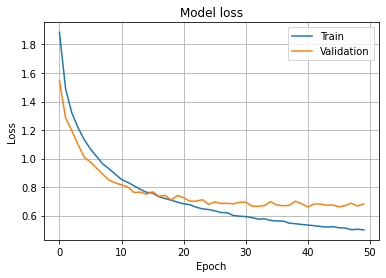

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,GlobalAveragePooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_apooling=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_apooling.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_apooling.add(Conv2D(32,(3,3),activation='relu'))
cnn_apooling.add(MaxPooling2D(pool_size=(2,2)))
cnn_apooling.add(Dropout(0.25)) # 드롭아웃 적용
cnn_apooling.add(Conv2D(64,(3,3),activation='relu'))
cnn_apooling.add(Conv2D(64,(3,3),activation='relu'))
cnn_apooling.add(MaxPooling2D(pool_size=(2,2)))
cnn_apooling.add(Dropout(0.25)) # 드롭아웃 적용
cnn_apooling.add(Conv2D(128,(3,3),activation='relu'))
cnn_apooling.add(AveragePooling2D(pool_size=(2,2)))

cnn_apooling.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_apooling.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_apooling.add(Dropout(0.5)) # 드롭아웃 적용
cnn_apooling.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_apooling.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn_apooling.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_apooling.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn_apooling.save("my_cnn_apooling.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

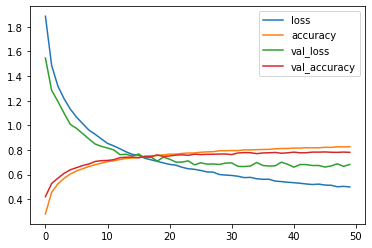

In [ ]:
cnn_apooling.summary()
print("2시간 16분 34초")
import pandas as pd
pd.DataFrame(hist.history).plot()

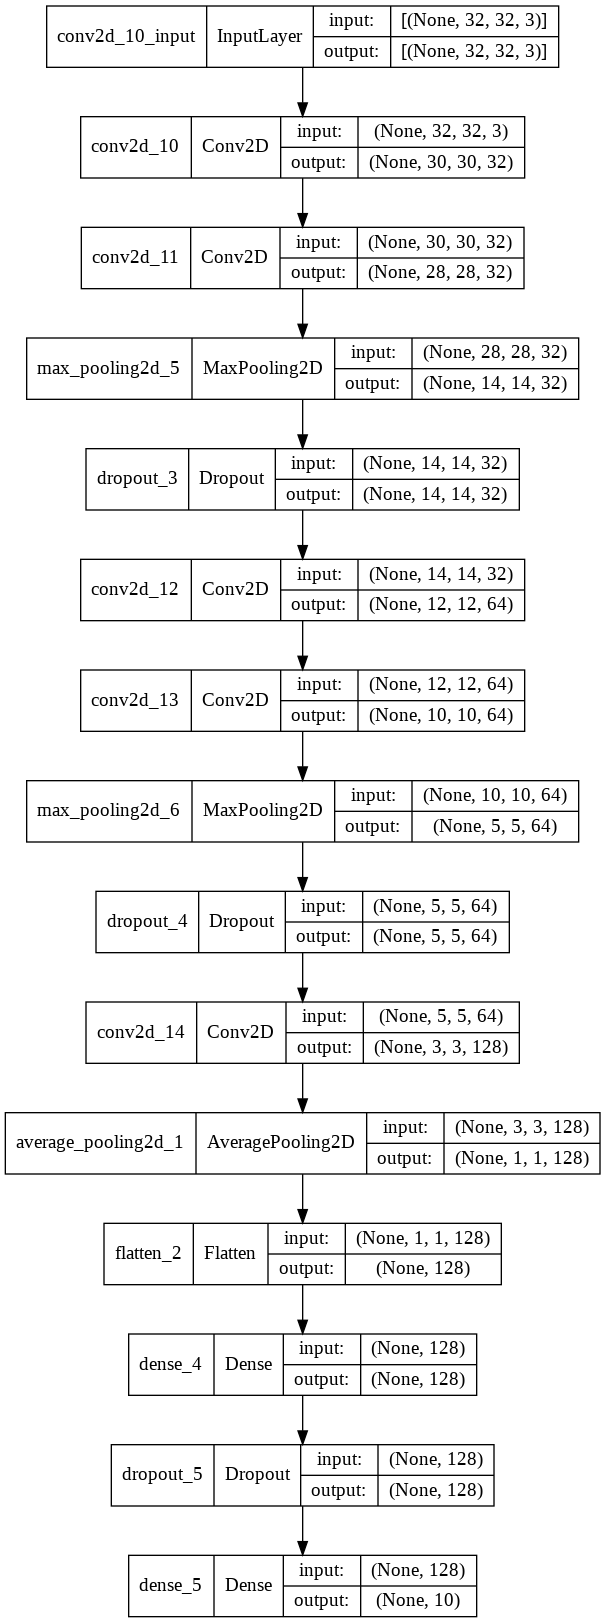

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn_apooling, "cnn_apooling.png", True)

Batch Normalization

Epoch 1/50
391/391 - 197s - loss: 1.5782 - accuracy: 0.4287 - val_loss: 2.4604 - val_accuracy: 0.2276 - 197s/epoch - 504ms/step
Epoch 2/50
391/391 - 202s - loss: 1.1873 - accuracy: 0.5835 - val_loss: 1.2003 - val_accuracy: 0.5775 - 202s/epoch - 516ms/step
Epoch 3/50
391/391 - 194s - loss: 1.0244 - accuracy: 0.6449 - val_loss: 0.9638 - val_accuracy: 0.6586 - 194s/epoch - 497ms/step
Epoch 4/50
391/391 - 194s - loss: 0.9327 - accuracy: 0.6795 - val_loss: 0.9053 - val_accuracy: 0.6795 - 194s/epoch - 497ms/step
Epoch 5/50
391/391 - 194s - loss: 0.8681 - accuracy: 0.7009 - val_loss: 0.8921 - val_accuracy: 0.6819 - 194s/epoch - 496ms/step
Epoch 6/50
391/391 - 197s - loss: 0.8132 - accuracy: 0.7200 - val_loss: 0.8008 - val_accuracy: 0.7210 - 197s/epoch - 505ms/step
Epoch 7/50
391/391 - 214s - loss: 0.7684 - accuracy: 0.7343 - val_loss: 0.8325 - val_accuracy: 0.7202 - 214s/epoch - 548ms/step
Epoch 8/50
391/391 - 195s - loss: 0.7257 - accuracy: 0.7500 - val_loss: 0.7682 - val_accuracy: 0.7407 - 

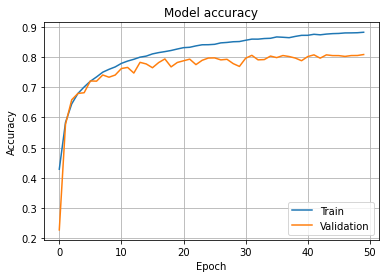

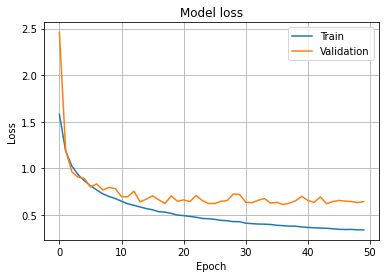

NotImplementedError: ignored

In [ ]:
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,GlobalAveragePooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_batchNor=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_batchNor.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_batchNor.add(BatchNormalization())
cnn_batchNor.add(Conv2D(32,(3,3),activation='relu'))
cnn_batchNor.add(BatchNormalization())
cnn_batchNor.add(MaxPooling2D(pool_size=(2,2)))
cnn_batchNor.add(Dropout(0.25)) # 드롭아웃 적용
cnn_batchNor.add(Conv2D(64,(3,3),activation='relu'))
cnn_batchNor.add(BatchNormalization())
cnn_batchNor.add(Conv2D(64,(3,3),activation='relu'))
cnn_batchNor.add(BatchNormalization())
cnn_batchNor.add(MaxPooling2D(pool_size=(2,2)))
cnn_batchNor.add(Dropout(0.25)) # 드롭아웃 적용
cnn_batchNor.add(Conv2D(128,(3,3),activation='relu'))
cnn_batchNor.add(BatchNormalization())
cnn_batchNor.add(AveragePooling2D(pool_size=(2,2)))

cnn_batchNor.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_batchNor.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_batchNor.add(Dropout(0.5)) # 드롭아웃 적용
cnn_batchNor.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_batchNor.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
hist=cnn_batchNor.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_batchNor.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

cnn_batchNor.summary()

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn_batchNor.save("my_cnn_batchNor.h5")

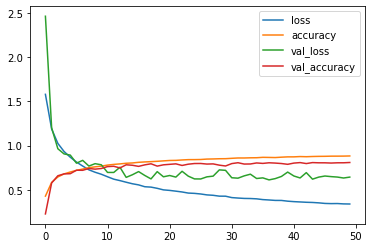

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()

Text(0.5, 1.0, 'BatchNormalization')

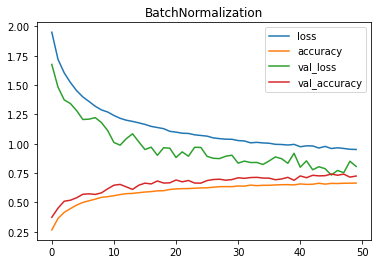

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()
plt.title("BatchNormalization")

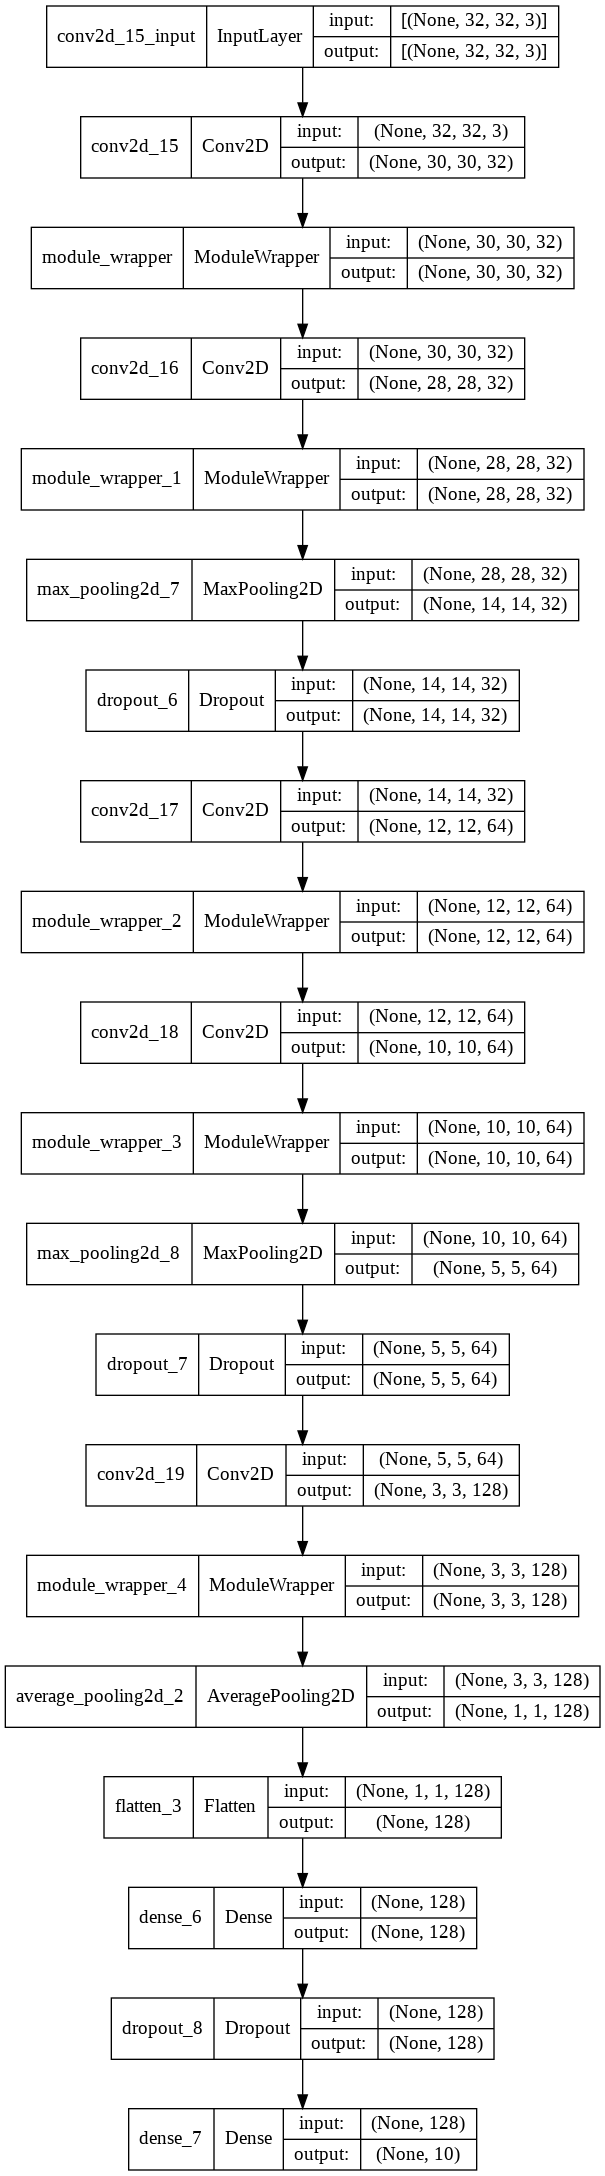

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn_batchNor, "cnn_batchNor.png", True)

교차 검증으로 드롭아웃의 성능 향상 효과 측정

170508288/170498071 [==============================] - 2s 0us/step
드롭아웃 적용 안 할 때:  0.7963799953460693
드롭아웃 적용할 때:  0.7426999926567077


{'boxes': [<matplotlib.lines.Line2D at 0x7fb875620fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb87563d0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb875644110>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb87563db90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb875632610>,
  <matplotlib.lines.Line2D at 0x7fb87564b250>]}

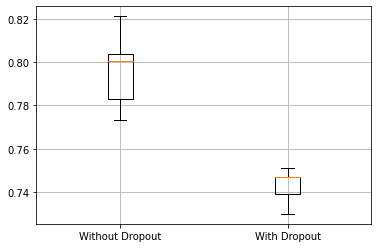

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저
from sklearn.model_selection import KFold

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

# 하이퍼 매개변수 설정
batch_siz = 128
n_epoch = 10
k = 5  # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):ㅑ
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    # 훈련 집합과 검증 집합으로 분할
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    ############################ 신경망 구조 설계 ############################
    cnn_drop=Sequential() # Sequential 함수 cnn2이라는 객체 생성
    cnn_drop.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
    cnn_drop.add(Conv2D(32,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Dropout(dropout_rate[0])) # 드롭아웃 적용
    cnn_drop.add(Conv2D(64,(3,3),activation='relu'))
    cnn_drop.add(Conv2D(64,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Dropout(dropout_rate[1])) # 드롭아웃 적용
    cnn_drop.add(Conv2D(128,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
    cnn_drop.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
    cnn_drop.add(Dropout(dropout_rate[2])) # 드롭아웃 적용
    cnn_drop.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

    ############################ 신경망 학습 및 정확도 측정 ############################
    cnn_drop.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고, 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
    cnn_drop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,verbose=0)
    accuracy.append(cnn_drop.evaluate(xval, yval, verbose=0)[1])
  return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때: ", np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때: ", np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"])
          

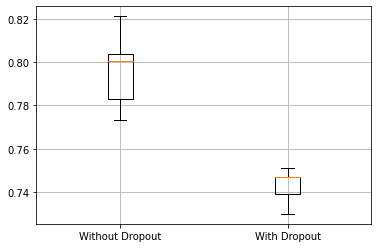

In [ ]:
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"])
plt.savefig('dropout test')

드롭아웃 실험 2

170508288/170498071 [==============================] - 2s 0us/step
드롭아웃 적용 안 할 때:  0.9407400886217753
드롭아웃 적용할 때:  0.8458599050839742


{'boxes': [<matplotlib.lines.Line2D at 0x7fbd79c0f810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd79c29890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd79c128d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd79c12390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbd79c0fdd0>,
  <matplotlib.lines.Line2D at 0x7fbd79c07a10>]}

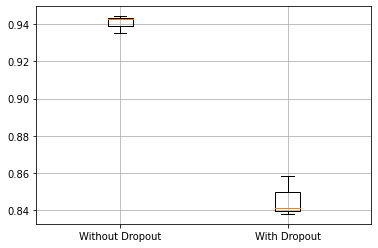

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저
from sklearn.model_selection import KFold

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

# 하이퍼 매개변수 설정
batch_siz = 128
n_epoch = 30
k = 3  # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    # 훈련 집합과 검증 집합으로 분할
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    ############################ 신경망 구조 설계 ############################
    cnn_drop=Sequential() # Sequential 함수 cnn2이라는 객체 생성
    cnn_drop.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
    cnn_drop.add(Conv2D(32,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Dropout(dropout_rate[0])) # 드롭아웃 적용
    cnn_drop.add(Conv2D(64,(3,3),activation='relu'))
    cnn_drop.add(Conv2D(64,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Dropout(dropout_rate[1])) # 드롭아웃 적용
    cnn_drop.add(Conv2D(128,(3,3),activation='relu'))
    cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
    cnn_drop.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
    cnn_drop.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
    cnn_drop.add(Dropout(dropout_rate[2])) # 드롭아웃 적용
    cnn_drop.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

    ############################ 신경망 학습 및 정확도 측정 ############################
    cnn_drop.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고, 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
    cnn_drop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,verbose=0)
    accuracy.append(cnn_drop.evaluate(xval, yval, verbose=0)[1])
  return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안 할 때: ", np.array(acc_without_dropout).mean())
print("드롭아웃 적용할 때: ", np.array(acc_with_dropout).mean())

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"])
          

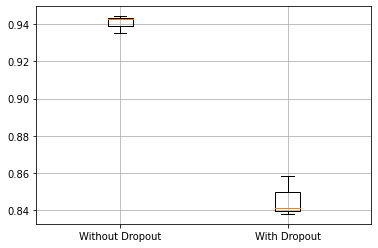

In [ ]:
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"])
plt.savefig('dropout test2')


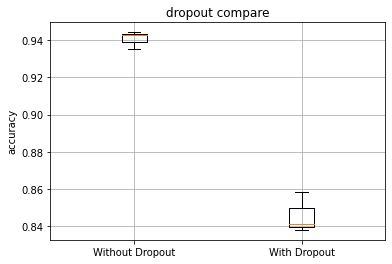

In [ ]:
plt.grid()
plt.boxplot([acc_without_dropout, acc_with_dropout], labels=["Without Dropout", "With Dropout"])
plt.title("dropout compare")
plt.ylabel("accuracy")
plt.savefig('dropout test2_2')


교차 검증으로 제거 조사

Epoch 1/5
391/391 - 157s - loss: 1.5291 - accuracy: 0.4442 - val_loss: 1.2394 - val_accuracy: 0.5569 - 157s/epoch - 402ms/step
Epoch 2/5
391/391 - 157s - loss: 1.1369 - accuracy: 0.5966 - val_loss: 1.0259 - val_accuracy: 0.6400 - 157s/epoch - 401ms/step
Epoch 3/5
391/391 - 154s - loss: 0.9509 - accuracy: 0.6669 - val_loss: 0.9158 - val_accuracy: 0.6816 - 154s/epoch - 395ms/step
Epoch 4/5
391/391 - 155s - loss: 0.8062 - accuracy: 0.7185 - val_loss: 0.8481 - val_accuracy: 0.7049 - 155s/epoch - 395ms/step
Epoch 5/5
391/391 - 154s - loss: 0.7073 - accuracy: 0.7527 - val_loss: 0.8406 - val_accuracy: 0.7129 - 154s/epoch - 394ms/step
Epoch 1/5
391/391 - 154s - loss: 1.5400 - accuracy: 0.4373 - val_loss: 1.2890 - val_accuracy: 0.5376 - 154s/epoch - 393ms/step
Epoch 2/5
391/391 - 155s - loss: 1.1279 - accuracy: 0.6000 - val_loss: 1.0755 - val_accuracy: 0.6189 - 155s/epoch - 396ms/step
Epoch 3/5
391/391 - 154s - loss: 0.9261 - accuracy: 0.6769 - val_loss: 0.9236 - val_accuracy: 0.6759 - 154s/epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
391/391 - 176s - loss: 1.6148 - accuracy: 0.4096 - val_loss: 1.3272 - val_accuracy: 0.5191 - 176s/epoch - 450ms/step
Epoch 2/5
391/391 - 174s - loss: 1.2737 - accuracy: 0.5420 - val_loss: 1.1157 - val_accuracy: 0.6062 - 174s/epoch - 446ms/step
Epoch 3/5
391/391 - 174s - loss: 1.1018 - accuracy: 0.6090 - val_loss: 0.9675 - val_accuracy: 0.6644 - 174s/epoch - 445ms/step
Epoch 4/5
391/391 - 175s - loss: 0.9781 - accuracy: 0.6563 - val_loss: 0.9104 - val_accuracy: 0.6801 - 175s/epoch - 446ms/step
Epoch 5/5
391/391 - 175s - loss: 0.9069 - accuracy: 0.6804 - val_loss: 0.8500 - val_accuracy: 0.6991 - 175s/epoch - 448ms/step
Epoch 1/5
391/391 - 176s - loss: 1.6296 - accuracy: 0.4025 - val_loss: 1.2430 - val_accuracy: 0.5541 - 176s/epoch - 450ms/step
Epoch 2/5
391/391 - 174s - loss: 1.2574 - accuracy: 0.5459 - val_loss: 1.0892 - val_accuracy: 0.6037 - 174s/epoch - 446ms/step
Epoch 3/5
391/391 - 176s - loss: 1.0977 - accuracy: 0.6095 - val_loss: 1.0689 - val_accuracy: 0.6314 - 176s/epo

{'boxes': [<matplotlib.lines.Line2D at 0x7f9f692bc0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9f692bf3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f692ac110>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f692bfa90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9f6dc57310>,
  <matplotlib.lines.Line2D at 0x7f9f6fe46890>]}

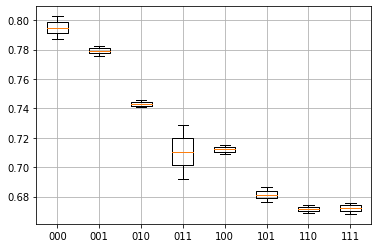

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

# 하이퍼 매개변수 설정
batch_siz = 128
n_epoch = 5
k = 2  # k-겹 교차 검증

# 하이퍼 매개변수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(data_gen, dropout_rate, l2_reg):
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    # 훈련 집합과 검증 집합으로 분할
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    ############################ 신경망 구조 설계 ############################
    cnn=Sequential() # Sequential 함수 cnn2이라는 객체 생성
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0])) # 드롭아웃 적용
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1])) # 드롭아웃 적용
    #cnn.add(Conv2D(128,(3,3),activation='relu'))
    #cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
    cnn.add(Dense(512,activation='relu')) # 완전 연결층을 쌓음
    cnn.add(Dropout(dropout_rate[2])) # 드롭아웃 적용
    cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg))) # 완전 연결층을 쌓음  가중치 감쇠

    ############################ 신경망 학습, 정확률 평가 ############################
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고, 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
    if data_gen:
      generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
      cnn.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    else:
      cnn.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    accuracy.append(cnn.evaluate(xval, yval, verbose=0)[1])
  return accuracy

# 하이퍼 매개변수를 달리하며 신경망 모델을 평가
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(True,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(True,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(True,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(True,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augmentation - Dropout - 12 regularizer] (교차검증 시도/평균)")
print("[000] (", acc_000, "/", np.array(acc_000).mean(),")")
print("[001] (", acc_001, "/", np.array(acc_001).mean(),")")
print("[010] (", acc_010, "/", np.array(acc_010).mean(),")")
print("[011] (", acc_011, "/", np.array(acc_011).mean(),")")
print("[100] (", acc_100, "/", np.array(acc_100).mean(),")")
print("[101] (", acc_101, "/", np.array(acc_101).mean(),")")
print("[110] (", acc_110, "/", np.array(acc_110).mean(),")")
print("[111] (", acc_111, "/", np.array(acc_111).mean(),")")

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111], labels=["000","001","010","011","100","101","110","111"])
                

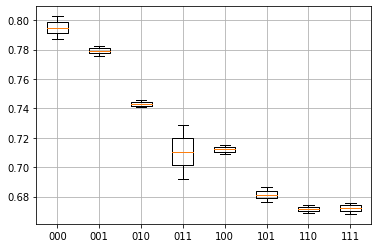

In [ ]:
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111], labels=["000","001","010","011","100","101","110","111"])
plt.savefig("교차검증.png");

CIFAR-10 데이터셋 확인

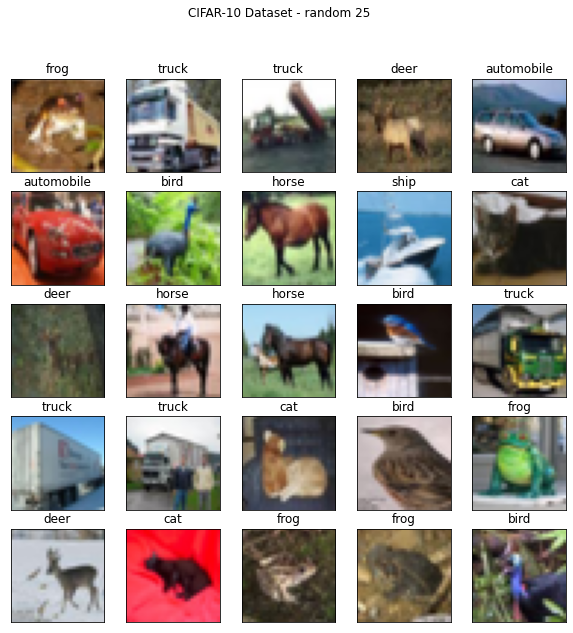

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 부류 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
plt.suptitle("CIFAR-10 Dataset - random 25")
for i, i_image in enumerate(np.random.randint(0, 4999, 25)):
  plt.subplot(5,5, i+1)
  #plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.title(class_names[int(y_train[i])])
#plt.show()
plt.savefig('cifar-10')

    



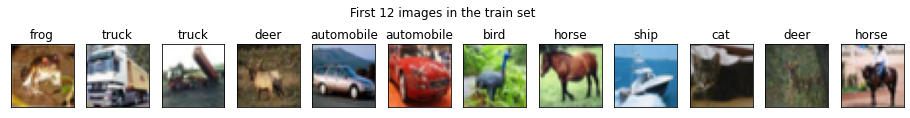

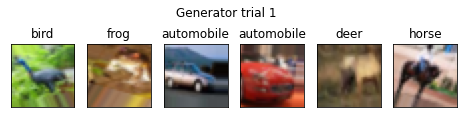

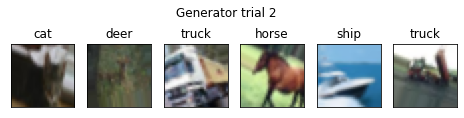

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:12,]; y_train=y_train[0:12,]
# CIFAR-10 부류 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
  plt.subplot(1,12, i+1)
  #plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.title(class_names[int(y_train[i])])
plt.show()
#plt.savefig('cifar-10')

#영상 증대기 생성
batch_siz = 6
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05, zoom_range=0.3, horizontal_flip= True)
gen = generator.flow(x_train, y_train, batch_size=batch_siz)

# 첫 번째 증대하고 그리기
img, label = gen.next()
plt.figure(figsize=(8,2))
plt.suptitle("Generator trial 1")
for i in range(batch_siz):
  plt.subplot(1,batch_siz, i+1)
  #plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[i])
  plt.title(class_names[int(label[i])])

# 두 번째 증대하고 그리기
img, label = gen.next()
plt.figure(figsize=(8,2))
plt.suptitle("Generator trial 2")
for i in range(batch_siz):
  plt.subplot(1,batch_siz, i+1)
  #plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[i])
  plt.title(class_names[int(label[i])])
    



ImageDataGenerator + Dropout

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
391/391 - 184s - loss: 2.0143 - accuracy: 0.2357 - val_loss: 1.7679 - val_accuracy: 0.3435 - 184s/epoch - 470ms/step
Epoch 2/50
391/391 - 181s - loss: 1.7950 - accuracy: 0.3358 - val_loss: 1.5056 - val_accuracy: 0.4396 - 181s/epoch - 463ms/step
Epoch 3/50
391/391 - 181s - loss: 1.6890 - accuracy: 0.3830 - val_loss: 1.4364 - val_accuracy: 0.4697 - 181s/epoch - 463ms/step
Epoch 4/50
391/391 - 183s - loss: 1.6233 - accuracy: 0.4114 - val_loss: 1.3491 - val_accuracy: 0.5054 - 183s/epoch - 467ms/step
Epoch 5/50
391/391 - 184s - loss: 1.5668 - accuracy: 0.4341 - val_loss: 1.3199 - val_accuracy: 0.5258 - 184s/epoch - 471ms/step
Epoch 6/50
391/391 - 185s - loss: 1.5313 - accuracy: 0.4522 - val_loss: 1.3316 - val_accuracy: 0.5073 - 185s/epoch - 472ms/step
Epoch 7/50
391/391 - 184s - loss: 1.4951 - accuracy: 0.4676 - val_loss: 1.2382 - val_accuracy: 0.5432 - 184s/epoch - 470ms/step
Epoch 8/50
391/391 - 181s - loss: 1.4657 - accuracy: 0.4784 - val_loss: 1.2338 - val_accuracy: 0.5536 - 

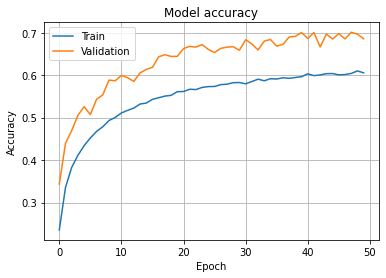

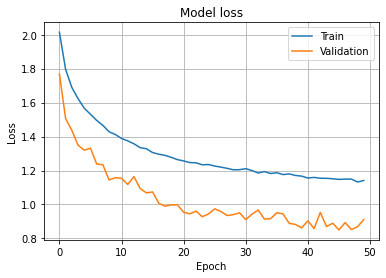

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_gen=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_gen.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_gen.add(Conv2D(32,(3,3),activation='relu'))
cnn_gen.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen.add(Dropout(0.25)) # 드롭아웃 적용
cnn_gen.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen.add(Dropout(0.25)) # 드롭아웃 적용
cnn_gen.add(Conv2D(128,(3,3),activation='relu'))
cnn_gen.add(MaxPooling2D(pool_size=(2,2)))

cnn_gen.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_gen.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_gen.add(Dropout(0.5)) # 드롭아웃 적용
cnn_gen.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_gen.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
batch_siz = 128
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05, zoom_range=0.3, horizontal_flip= True)
hist=cnn_gen.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_gen.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn_gen.save("my_cnn_gen.h5")

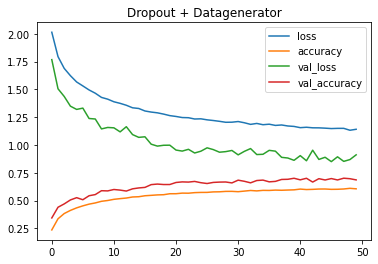

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()
plt.title('Dropout + Datagenerator')
plt.savefig('CIFAR-10 Dropout + Datagenerator')

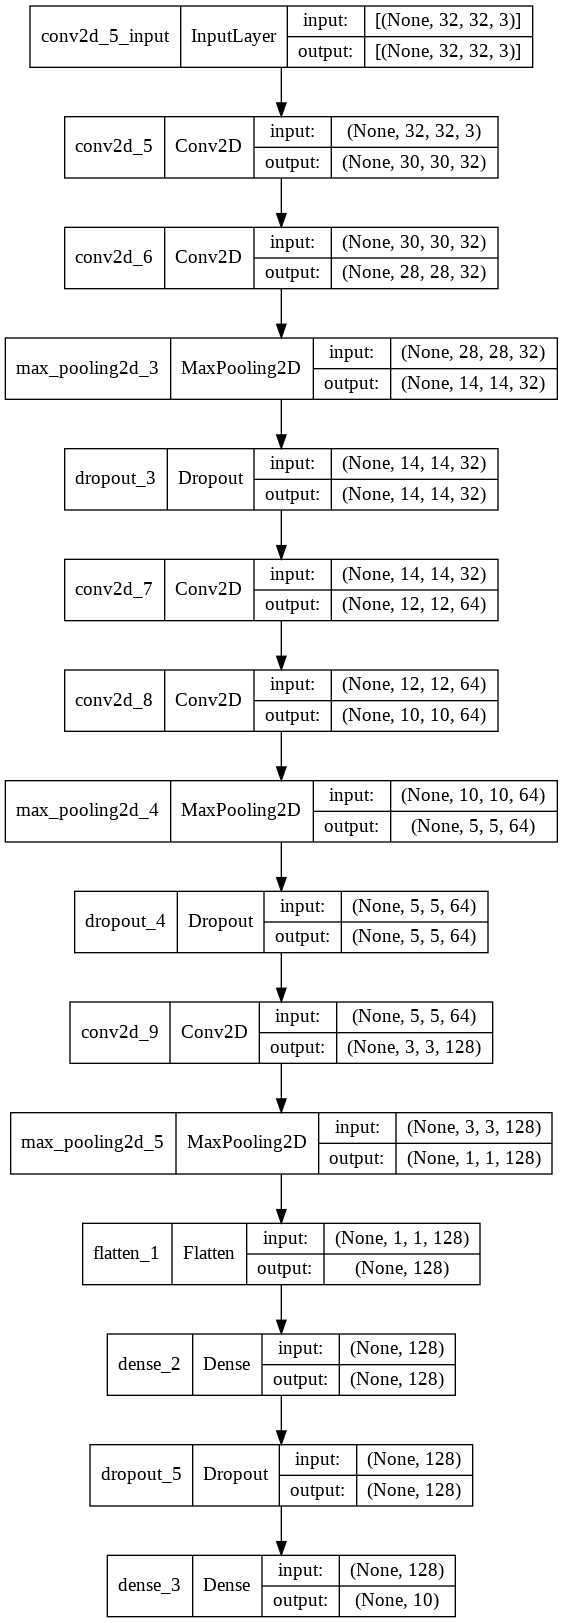

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn_gen, "cnn_Dropout+Datagenerator.png", True)

ImageDataGenerator

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
391/391 - 183s - loss: 1.9497 - accuracy: 0.2664 - val_loss: 1.6754 - val_accuracy: 0.3737 - 183s/epoch - 467ms/step
Epoch 2/50
391/391 - 180s - loss: 1.7188 - accuracy: 0.3639 - val_loss: 1.4823 - val_accuracy: 0.4516 - 180s/epoch - 459ms/step
Epoch 3/50
391/391 - 179s - loss: 1.6037 - accuracy: 0.4158 - val_loss: 1.3736 - val_accuracy: 0.5105 - 179s/epoch - 457ms/step
Epoch 4/50
391/391 - 178s - loss: 1.5214 - accuracy: 0.4479 - val_loss: 1.3423 - val_accuracy: 0.5193 - 178s/epoch - 455ms/step
Epoch 5/50
391/391 - 178s - loss: 1.4521 - accuracy: 0.4780 - val_loss: 1.2822 - val_accuracy: 0.5402 - 178s/epoch - 455ms/step
Epoch 6/50
391/391 - 180s - loss: 1.3988 - accuracy: 0.5003 - val_loss: 1.2066 - val_accuracy: 0.5700 - 180s/epoch - 459ms/step
Epoch 7/50
391/391 - 180s - loss: 1.3597 - accuracy: 0.5149 - val_loss: 1.2098 - val_accuracy: 0.5737 - 180s/epoch - 460ms/step
Epoch 8/50
391/391 - 178s - loss: 1.3193 - accuracy: 0.5284 - val_loss: 1.2224 - val_accuracy: 0.5686 - 

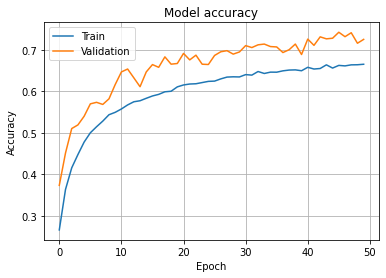

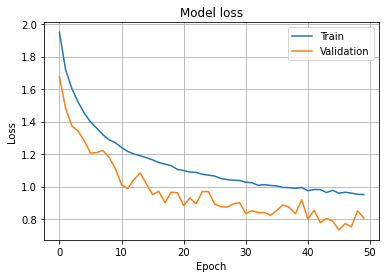

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_gen2=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_gen2.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_gen2.add(Conv2D(32,(3,3),activation='relu'))
cnn_gen2.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen2.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen2.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen2.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen2.add(Conv2D(128,(3,3),activation='relu'))
cnn_gen2.add(MaxPooling2D(pool_size=(2,2)))

cnn_gen2.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_gen2.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_gen2.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_gen2.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
batch_siz = 128
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05, zoom_range=0.3, horizontal_flip= True)
hist=cnn_gen2.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_gen2.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn_gen2.save("my_cnn_gen2.h5")

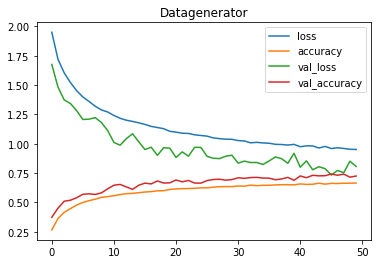

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()
plt.title( 'Datagenerator')
plt.savefig('CIFAR-10 Datagenerator(gen2)')

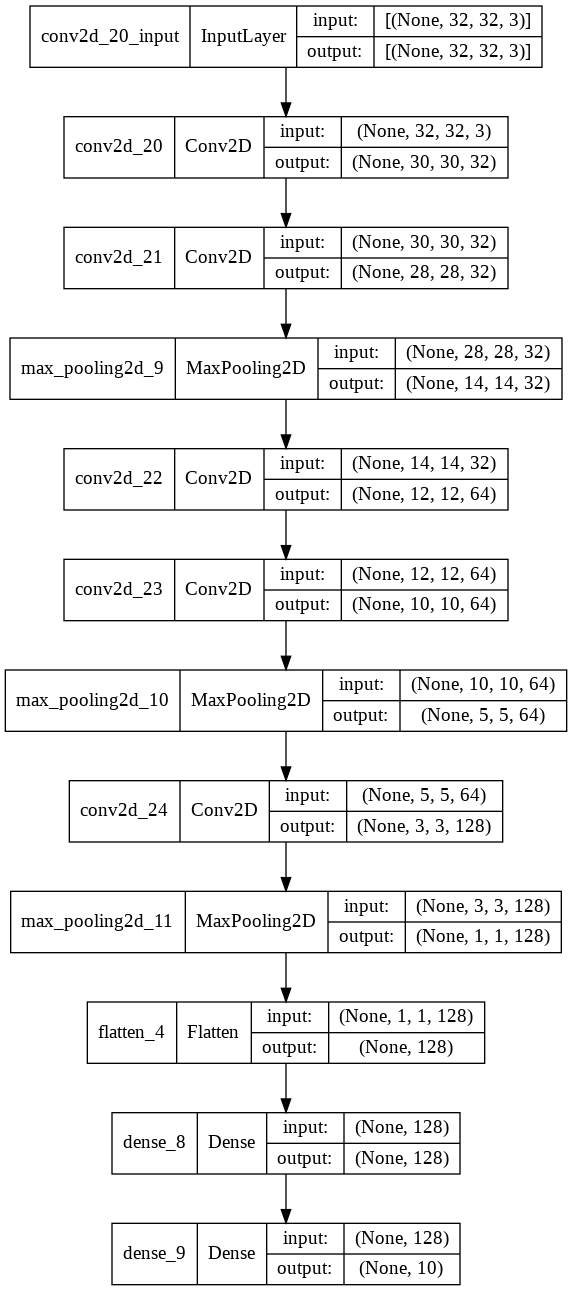

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn_gen2, "cnn_Dropout+Datagenerator.png", True)

ImageDataGenerator + AveragePooling2D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
391/391 - 183s - loss: 1.9469 - accuracy: 0.2647 - val_loss: 1.6657 - val_accuracy: 0.3874 - 183s/epoch - 468ms/step
Epoch 2/50
391/391 - 180s - loss: 1.7443 - accuracy: 0.3539 - val_loss: 1.5015 - val_accuracy: 0.4644 - 180s/epoch - 461ms/step
Epoch 3/50
391/391 - 178s - loss: 1.6323 - accuracy: 0.4022 - val_loss: 1.3945 - val_accuracy: 0.4967 - 178s/epoch - 456ms/step
Epoch 4/50
391/391 - 182s - loss: 1.5511 - accuracy: 0.4360 - val_loss: 1.3873 - val_accuracy: 0.4977 - 182s/epoch - 466ms/step
Epoch 5/50
391/391 - 178s - loss: 1.4890 - accuracy: 0.4599 - val_loss: 1.3392 - val_accuracy: 0.5184 - 178s/epoch - 455ms/step
Epoch 6/50
391/391 - 178s - loss: 1.4516 - accuracy: 0.4776 - val_loss: 1.1933 - val_accuracy: 0.5740 - 178s/epoch - 456ms/step
Epoch 7/50
391/391 - 178s - loss: 1.3968 - accuracy: 0.4993 - val_loss: 1.2311 - val_accuracy: 0.5648 - 178s/epoch - 455ms/step
Epoch 8/50
391/391 - 178s - loss: 1.3620 - accuracy: 0.5107 - val_loss: 1.1770 - val_accuracy: 0.5865 - 

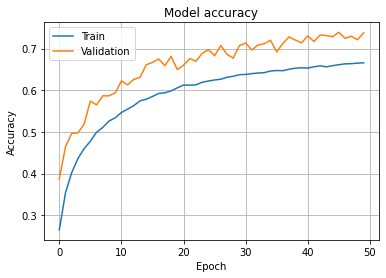

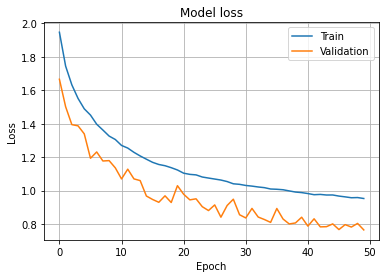

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_gen3=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_gen3.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_gen3.add(Conv2D(32,(3,3),activation='relu'))
cnn_gen3.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen3.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen3.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen3.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen3.add(Conv2D(128,(3,3),activation='relu'))
cnn_gen3.add(AveragePooling2D(pool_size=(2,2)))

cnn_gen3.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_gen3.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_gen3.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_gen3.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
batch_siz = 128
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05, zoom_range=0.3, horizontal_flip= True)
hist=cnn_gen3.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_gen3.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
cnn_gen3.save("my_cnn_gen3.h5")

DataGenerator+BatchNormal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
391/391 - 222s - loss: 1.6873 - accuracy: 0.3864 - val_loss: 2.4399 - val_accuracy: 0.2332 - 222s/epoch - 569ms/step
Epoch 2/50
391/391 - 223s - loss: 1.4374 - accuracy: 0.4823 - val_loss: 1.4186 - val_accuracy: 0.5222 - 223s/epoch - 570ms/step
Epoch 3/50
391/391 - 226s - loss: 1.3185 - accuracy: 0.5309 - val_loss: 1.1752 - val_accuracy: 0.5846 - 226s/epoch - 578ms/step
Epoch 4/50
391/391 - 224s - loss: 1.2438 - accuracy: 0.5585 - val_loss: 1.1148 - val_accuracy: 0.6098 - 224s/epoch - 573ms/step
Epoch 5/50
391/391 - 223s - loss: 1.1823 - accuracy: 0.5809 - val_loss: 1.0546 - val_accuracy: 0.6315 - 223s/epoch - 571ms/step
Epoch 6/50
391/391 - 223s - loss: 1.1414 - accuracy: 0.5963 - val_loss: 1.0652 - val_accuracy: 0.6368 - 223s/epoch - 571ms/step
Epoch 7/50
391/391 - 223s - loss: 1.1135 - accuracy: 0.6066 - val_loss: 0.9007 - val_accuracy: 0.6901 - 223s/epoch - 571ms/step
Epoch 8/50
391/391 - 225s - loss: 1.0791 - accuracy: 0.6215 - val_loss: 0.9275 - val_accuracy: 0.6742 - 

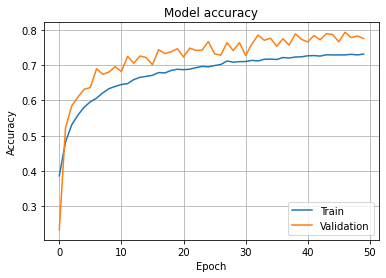

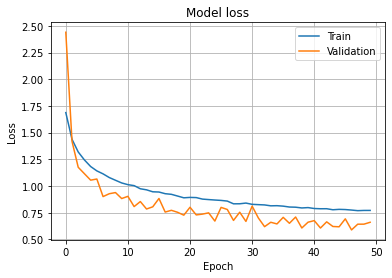

In [ ]:
from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 데이터 증대
from tensorflow.keras.models import Sequential # models 클래스는 Sequential을 불러옴. Sequential은 층을 한 줄로 쌓는데 사용
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,GlobalAveragePooling2D,Flatten,Dense,Dropout # layers 클래스는 인접한 두 층이 완전연결된 경우에 쓰는 Dense를 불러옴. Dense는 완전 연결 층
from tensorflow.keras.optimizers import Adam # Adam 옵티마이저

# CIFAR-10 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ndarray로 변환 
x_train = x_train.astype(np.float32)/255.0 # 정수를 실수형으로 바꾸고 [0,255] 범위를 [0,1] 범위로 정규화한다.
x_test = x_test.astype(np.float32)/255.0 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10) # 레이블을 원핫 코드로 변환

############################ 신경망 구조 설계 ############################
# LeNet-5 신경망 모델 설계 -> C-P-C-P-C-FC-FC 순서로 층을 쌓는다. (add 함수로 층을 쌓아 신경망 설계)
cnn_gen4=Sequential() # Sequential 함수 cnn2이라는 객체 생성
# 32,(3,3)은 3*3 크기의 커널을 32개 사용하라는 뜻. input_shape=(28,28,1) 매개변수는 신경망에 (28*28*1)텐서가 입력된다는 사실 알려줌, RGB 영상의 경우 (28*28*3)
cnn_gen4.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) 
cnn_gen4.add(BatchNormalization())
cnn_gen4.add(Conv2D(32,(3,3),activation='relu'))
cnn_gen4.add(BatchNormalization())
cnn_gen4.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen4.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen4.add(BatchNormalization())
cnn_gen4.add(Conv2D(64,(3,3),activation='relu'))
cnn_gen4.add(BatchNormalization())
cnn_gen4.add(MaxPooling2D(pool_size=(2,2)))
cnn_gen4.add(Conv2D(128,(3,3),activation='relu'))
cnn_gen4.add(BatchNormalization())
cnn_gen4.add(AveragePooling2D(pool_size=(2,2)))

cnn_gen4.add(Flatten()) # 다차원 구조를 1차원 구조로 변환
cnn_gen4.add(Dense(128,activation='relu')) # 완전 연결층을 쌓음
cnn_gen4.add(Dense(10,activation='softmax')) # 완전 연결층을 쌓음

############################ 신경망 학습 ############################
cnn_gen4.compile(loss='categorical_crossentropy', optimizer=Adam(), # 손실 함수로 categorical_crossentropy를 쓰고, 옵티마이저로 Adam를 쓰고,
                   metrics=['accuracy']) # 학습 도중에 손실 함수 값을 측정해 출력하라는 명령어
batch_siz = 128
generator = ImageDataGenerator(rotation_range=30.0, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05, zoom_range=0.3, horizontal_flip= True)
hist=cnn_gen4.fit_generator(generator.flow(x_train, y_train, batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습을 수행.  fit함수의 결과를 hist에 저장
# x,y는 훈련집합. epochs 매개변수는 반복할 세대 수를 지정. verbose 매개변수는 학습 도중에 발생하는 정보를 출력하는 방식을 지정하는데,

############################ 학습된 신경망으로 예측 ############################
res=cnn_gen4.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

cnn_gen4.summary()

import matplotlib.pyplot as plt
res=cnn_gen4.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
#cnn_gen4.save("my_cnn_batchNor.h5")

정확률은 77.54999995231628


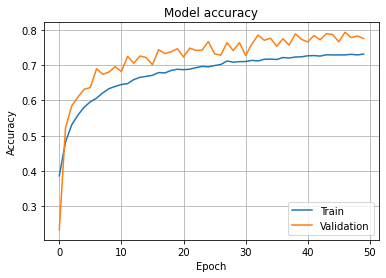

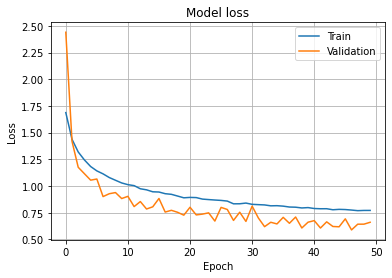

In [ ]:
import matplotlib.pyplot as plt
res=cnn_gen4.evaluate(x_test,y_test,verbose=0) # 테스트 집합을 가지고 성능 측정, 출력
print("정확률은", res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()
#cnn_gen4.save("my_cnn_batchNor.h5")

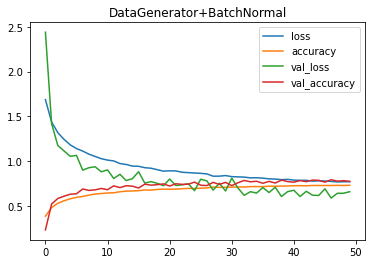

In [ ]:
import pandas as pd
pd.DataFrame(hist.history).plot()
plt.title( 'DataGenerator+BatchNormal')
plt.savefig('DataGenerator+BatchNormal(gen4)')

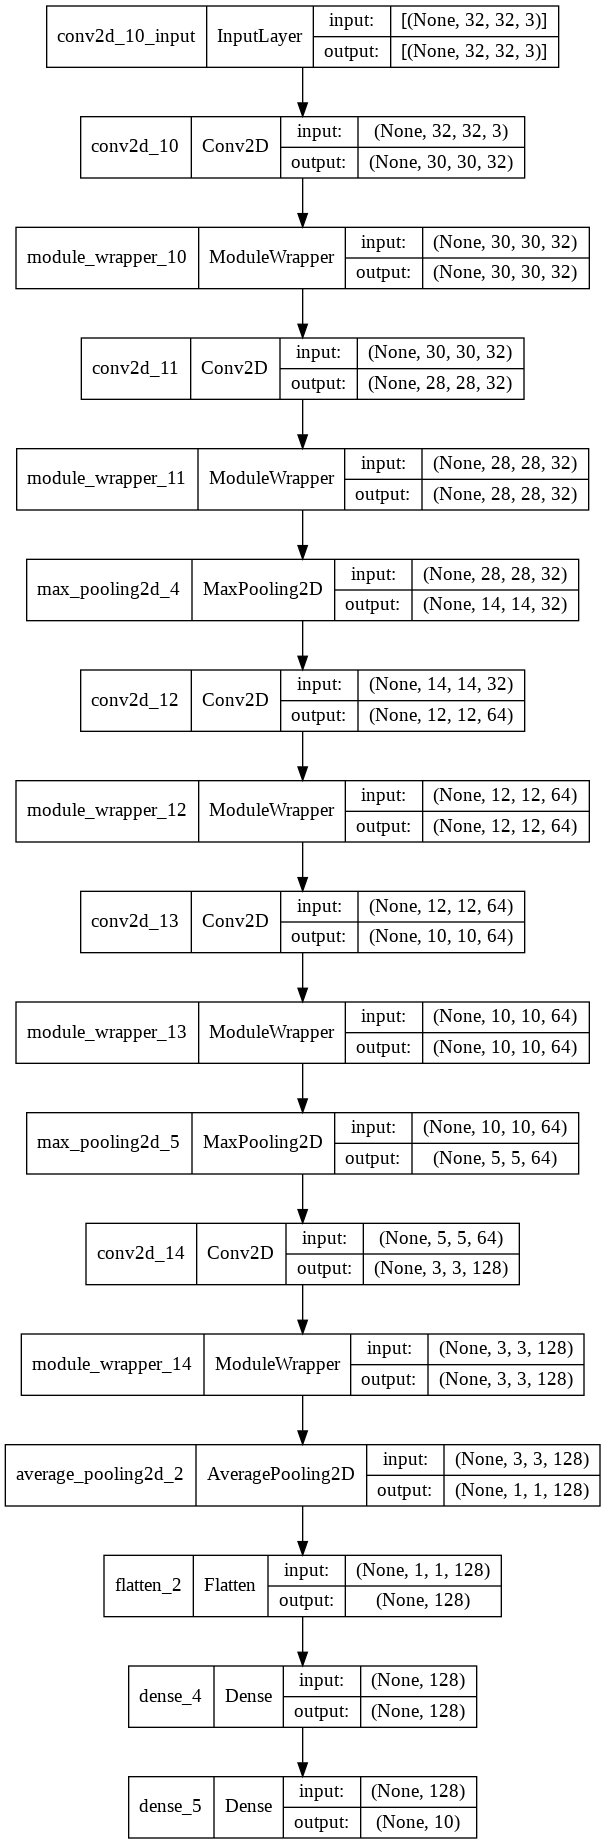

In [ ]:
from tensorflow.keras import layers, models, losses, optimizers, datasets, utils
utils.plot_model(cnn_gen4, "DataGenerator+BatchNormal(gen4).png", True)